In [49]:
import pandas as pd
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup

from lxml import etree as et
import numpy.linalg as la

# Начало работы с данными


In [12]:
# Преступность в России: 2003 – 2020 годы
# Информация о преступности в России за каждый месяц с 2003 по 2020-ый годы
# общее число преступлений, тяжкие и особо тяжкие, причинившие особо крупный ущерб, экологические,
# терроризм, экстремизм, убийство и покушение на убийство, тяжкое причинение вреда здоровью,
# изнасилование и покушение на изнасилование.
df = pd.read_csv('https://hubofdata.ru/dataset/f426ad0e-8dc1-44e2-8b37-e361ccb7b564/resource/3d3c7a68-b047-48d2-94c0-54d01b1abb39/download/crime.csv')
print(df.shape)
df.head()

(205, 16)


,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0
3,01.04.2003,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0
4,01.05.2003,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0


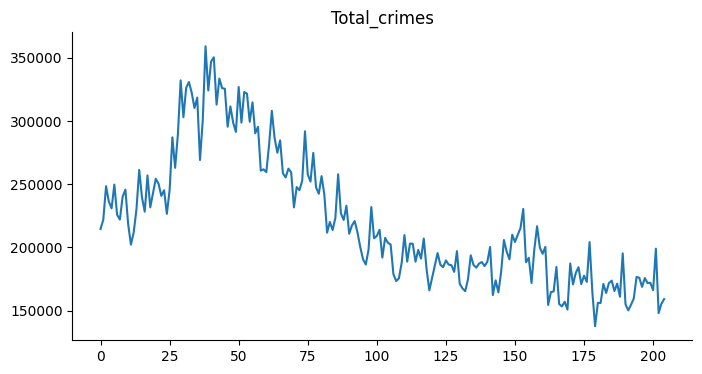

In [13]:
df['Total_crimes'].plot(kind='line', figsize=(8, 4), title='Total_crimes')
plt.gca().spines[['top', 'right']].set_visible(False)

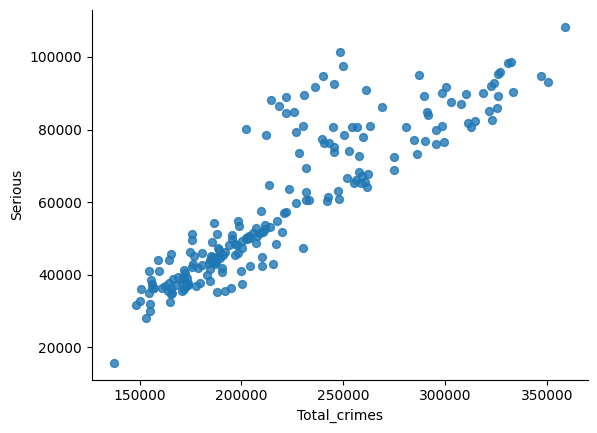

In [14]:
df.plot(kind='scatter', x='Total_crimes', y='Serious', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

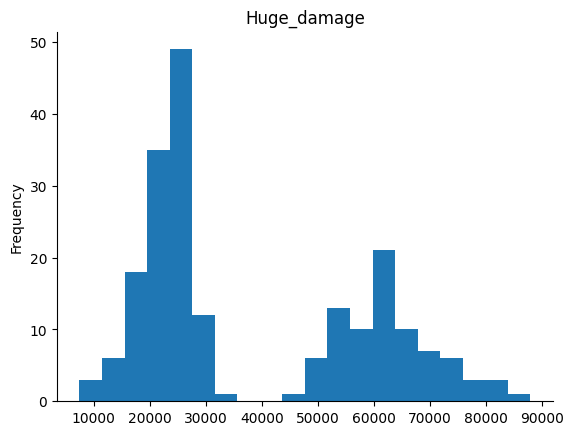

In [15]:
df['Huge_damage'].plot(kind='hist', bins=20, title='Huge_damage')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
pip install requests beautifulsoup4 selenium

In [17]:
video_url = "https://www.youtube.com/watch?v=q6ApUMyGGWA"

# Парсинг таблицы с сайта


In [18]:
url_migr = 'https://proza.ru/2023/04/01/1612?ysclid=lw0jh2jc99760797084'

page = requests.get(url_migr)
page

<Response [200]>

In [44]:
import requests
# отправляем запрос с заголовками по нужному адресу
req = requests.get('https://proza.ru/2023/04/01/1612?ysclid=lw0jh2jc99760797084')
# считываем текст HTML-документ
src = req.text


In [45]:
soup = BeautifulSoup(src, 'html.parser')

In [21]:
text = str(soup)

В таблице ниже указаны данные про миграционный прирост (+сколько человек прибыло и выбыло)

In [22]:
def find_text_1(text, keyword):
    index = text.find(keyword)
    if index != -1:
        return text[index + len(keyword):index + len(keyword) + 2520]
    else:
        return "Ключевое слово не найдено в тексте"

# Пример текста для поиска
text = str(soup)

# Вызываем функцию и выводим результат
result_1 = find_text_1(text, 'Таблица 1')

# Разбиваем текст на строки и удаляем пустые строки
rows = [row.strip() for row in result_1.split('\n') if row.strip()]

# Создаем список списков для таблицы
table_data = []
for row in rows:
    # Разбиваем строку на ячейки, используя пробелы как разделитель
    cells = row.split()
    table_data.append(cells)

# Создаем DataFrame из списка списков
df_1 = pd.DataFrame(table_data)

# Названия столбцов
column_names = ['Год', 'Прибыло всего', 'Выбыло всего', 'Миграционный прирост', 'Пусто' ]

# Присваиваем названия столбцам ДФ
df_1.columns = column_names

# Переименование
df_1 = df_1.rename(columns={'0': 'Год', '1': 'Прибыло всего', '2': 'Выбыло всего', '3': 'Миграционный прирост', '4': 'Пусто' })
# Удаляем последний столбец
df_1 = df_1.iloc[:, :-1]
# Список индексов строк для удаления
rows_to_drop = [0, 1, 2, 3, 4, 5, 6, 11, 13, 22, 25, 43]

# Удаление строк по индексам (полностью пустые строки, в тексте были абзацами)
df_1 = df_1.drop(rows_to_drop)
# Сброс индекса и удаление старого индекса (reset_index : создает новый индекс, начинающийся с 0)
df_1 = df_1.reset_index(drop=True)

# Удаление из последнего столбца
df_1.iloc[:, -1] = df_1.iloc[:, -1].str.replace("<br/>", "")

# Сохраняем DataFrame в CSV файл
df.to_csv('table.csv', index=False, encoding='utf-8')
# Выводим DataFrame
print(df_1.shape)
df_1.head()





(32, 4)


,Год,Прибыло всего,Выбыло всего,Миграционный прирост
0,1990,913223,729467,183756
1,1991,692238,675497,16741
2,1992,926020,673143,252877
3,1993,923280,483028,440252
4,1994,1146735,337121,809614


МП - миграционный прирост в количестве человек


Таблица ниже говорит о Миграционном приросте за десятилетия в различных СНГ странах, которые могут помочь сделать выводы о том, есть ли корреляция между мигрантами и возросшей преступностью, есть ли каузация.

In [43]:
def find_text_2(text, keyword):
    index = text.find(keyword)
    if index != -1:
        return text[index + len(keyword):index + len(keyword) + 1703]
    else:
        return "Ключевое слово не найдено в тексте"

# Пример текста для поиска
text = str(soup)

# Вызываем функцию и выводим результат
result_2 = find_text_2(text, 'Таблица 2')

# Разбиваем текст на строки и удаляем пустые строки
rows = [row.strip() for row in result_2.split('\n') if row.strip()]

# Создаем список списков для таблицы
table_data2 = []
for row in rows:
    # Разбиваем строку на ячейки, используя пробелы как разделитель
    cells2 = row.split()
    table_data2.append(cells2)

# Создаем DataFrame из списка списков
df_2 = pd.DataFrame(table_data2)
# Названия столбцов
column_names2 = ['Страна', 'МП 1990-1999 гг.', 'МП 2000-2009 гг.', 'МП 2010-2019 гг.', 'МП за все годы', 'Пусто1', 'Пусто2' ]

# Присваиваем названия столбцам DataFrame
df_2.columns = column_names2

# Переименование
df_2 = df_2.rename(columns={'0': 'Страна', '1': 'МП 1990-1999 гг.', '2': 'МП 2000-2009 гг.', '3': 'МП 2010-2019 гг.', '4': 'МП за все годы', '5': 'Пусто1', '6': 'Пусто2' })
# Удаляем последний столбец
df_2 = df_2.iloc[:, :-2]
# Список индексов строк для удаления
rows_to_drop2 = [0, 1, 2, 3, 8, 15, 20, 24, 25]

# Удаление строк по индексам
df_2 = df_2.drop(rows_to_drop2)
# Сброс индекса и удаление старого индекса (reset_index : создает новый индекс, начинающийся с 0)
df_2 = df_2.reset_index(drop=True)

# Удаление из последнего столбца
df_2.iloc[:, -1] = df_2.iloc[:, -1].str.replace("<br/>", "")

# Сохраняем DataFrame в CSV файл
df.to_csv('table.csv', index=False, encoding='utf-8')
# Выводим DataFrame
print(df_2.shape)
df_2.head()

(17, 5)


,Страна,МП 1990-1999 гг.,МП 2000-2009 гг.,МП 2010-2019 гг.,МП за все годы
0,Грузия,354822,77727,42012,474561
1,Азербайджан,339205,97111,42012,573948
2,Армения,186773,49202,35114,571089
3,Закавказье,880800,324040,414758,1619598
4,Казахстан,1444961,402270,338779,2186010


# Разводы и безработица

In [54]:
# данные по областям, количество разводов на 100 браков
# делаем предположение, что более высокое число разводов может повлиять на более высокую преступность
df_razvod = pd.read_csv('https://russia.duck.consulting/maps/98.csv')
del df_razvod['Unnamed: 0'] # удаляем пустой столбец, который был пробелом
# Меняем названия столбцов
df_razvod.columns = ['Регион', 'Количество разводов']

df_razvod

,Регион,Количество разводов
0,Алтайский край,72.13
1,Амурская область,70.83
2,Архангельская область,68.25
3,Астраханская область,63.64
4,Башкортостан,61.29
...,...,...
79,Чувашия,61.11
80,Чукотский автономный округ,73.24
81,Якутия,66.15
82,Ямало-Ненецкий автономный округ,74.03


In [55]:
# безработица в России
url = 'https://rosstat.gov.ru/storage/mediabank/Trud-1_15-s.xlsx'
df_bezrab = pd.read_excel(url, sheet_name=2)  # для чтения третьей страницы
# необходимо почистить от пропусков и адаптировать таблицу
df_bezrab

,К содержанию,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Уровень участия в рабочей силе населения в воз...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(по данным выборочных обследований рабочей силы),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,В процентах
3,NaN,2017.0,2018.0,2019.0,2020.0,2021.0,20221)2),20231)
4,Российская Федерация,62.8,62.8,62.3,62.0,62.4,62.2,62.8
...,...,...,...,...,...,...,...,...
97,Сахалинская область,69.1,69.5,68.7,69.2,69.3,70,70.1
98,Еврейская автономная область,61.8,60.3,59.7,60.9,60.6,61.7,60.1
99,Чукотский автономный округ,79.5,77.8,80.5,79.7,78.7,77.9,79.1
100,1) Без учета статистической информации по Доне...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Создание совместных таблиц